In [9]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm
import pandas as pd

In [6]:
n_point = 25
x = np.linspace(1,10, n_point)
u = npr.normal(0,8, n_point)
b1=2
b2=5
y = b1+b2*x+u

In [12]:
df = pd.DataFrame({'x':x,'y':y})
ols = sm.ols(formula='y~x', data=df)
res = ols.fit()

In [14]:
ypred = res.predict(df['x'])

In [13]:
res.params

Intercept   -1.784511
x            5.090812
dtype: float64

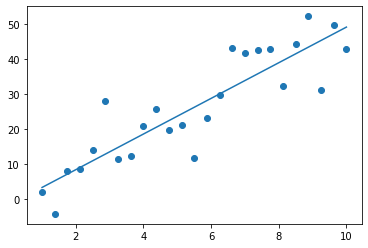

In [15]:
plt.scatter(x,y)
plt.plot(x,ypred)

### Pair Bootstrap

In [16]:
df = pd.DataFrame({'x':x,'y':y})
ols = sm.ols(formula='y~x', data=df)
res = ols.fit()
ypred = res.predict(df['x'])

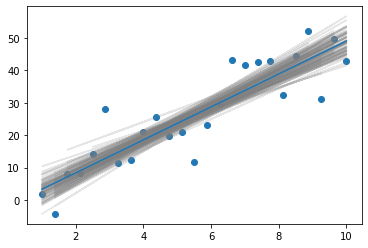

In [26]:
b1_pair = []
b2_pair = []

n_boot=100

plt.figure()

for i in range(n_boot):
    sample_df = df.sample(n=n_point, replace=True) 
    ols_boot = sm.ols(formula='y~x', data=sample_df)
    res_boot = ols_boot.fit()
    
    b1_pair.append(res_boot.params[0])
    b2_pair.append(res_boot.params[1])
    
    ypred_boot = res_boot.predict(sample_df['x'])
    plt.plot(sample_df['x'], ypred_boot, color='grey', alpha=0.2)


plt.scatter(x,y)
plt.plot(x,ypred)   

/home/xenakas/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

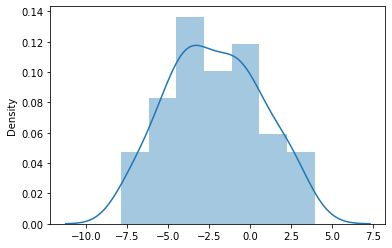

In [22]:
sns.distplot(b1_pair)

In [24]:
np.percentile(b1_pair,[2.5,97.5])

array([-7.27264057,  2.85217307])

/home/xenakas/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

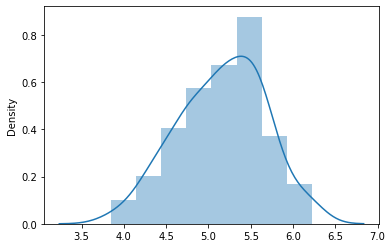

In [23]:
sns.distplot(b2_pair)

In [25]:
np.percentile(b2_pair,[2.5,97.5])

array([4.19089627, 6.15238186])

### Bootstrapping Residuals

In [27]:
df = pd.DataFrame({'x':x,'y':y})
ols = sm.ols(formula='y~x', data=df)
res = ols.fit()
ypred = res.predict(df['x'])
residuals = res.resid

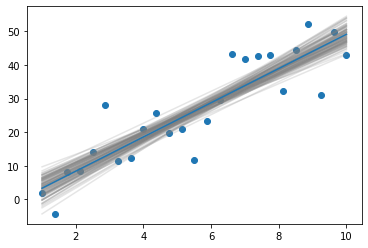

In [28]:
b1_res = []
b2_res = []

n_boot=100

plt.figure()

for i in range(n_boot):
    
    boot_res = npr.choice(residuals, n_point, replace=True)
    y_boot = ypred + boot_res
    
    sample_df = pd.DataFrame({'x':x,'y':y_boot})
    ols_boot = sm.ols(formula='y~x', data=sample_df)
    res_boot = ols_boot.fit()
    
    b1_res.append(res_boot.params[0])
    b2_res.append(res_boot.params[1])
    
    ypred_boot = res_boot.predict(sample_df['x'])
    plt.plot(sample_df['x'], ypred_boot, color='grey', alpha=0.2)

plt.scatter(x,y)
plt.plot(x,ypred)   

/home/xenakas/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/xenakas/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

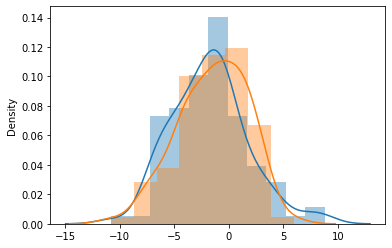

In [29]:
sns.distplot(b1_pair)
sns.distplot(b1_res)

/home/xenakas/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/xenakas/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

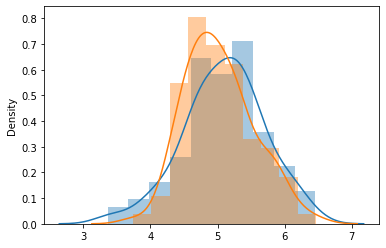

In [30]:
sns.distplot(b2_pair)
sns.distplot(b2_res)